# E-Commerce Transactions Dataset



In this notebook, we will conduct exploratory data analysis (EDA) on the E-Commerce Transactions Dataset. My primary interest in selecting this data is to better understand the "why" behind business performance. We seek to understand the data's patterns, relationships, and potential trends, while ensuring its quality to support accurate and meaningful insights.

In [10]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [11]:
ecommerce_df = pd.read_csv("https://raw.githubusercontent.com/floresadonis333/Ecommerce_transaction_df/refs/heads/main/ecommerce_transactions.csv")

ecommerce_df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [12]:
ecommerce_df.shape

(50000, 8)

In [13]:
ecommerce_df.tail()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
49995,49996,Isabella Rodriguez,53,India,Electronics,140.09,UPI,2024-08-07
49996,49997,Emma Hall,30,France,Home & Kitchen,815.31,Cash on Delivery,2025-02-07
49997,49998,Isabella Allen,50,Australia,Beauty,535.77,UPI,2023-08-11
49998,49999,Olivia Clark,48,Australia,Grocery,370.99,Cash on Delivery,2025-01-02
49999,50000,Olivia Harris,70,Canada,Sports,577.66,Credit Card,2024-06-03


In [14]:
ecommerce_df.sample(4)

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
17564,17565,Ava Thompson,62,France,Electronics,83.21,Cash on Delivery,2024-08-23
9981,9982,James Clark,21,USA,Clothing,673.07,Net Banking,2024-04-26
14268,14269,Emma Hall,33,USA,Beauty,397.38,Net Banking,2024-11-08
43889,43890,Sophia Thompson,51,Germany,Grocery,393.32,Debit Card,2023-10-04


I dont see any NaN values as of right now but I am still going to run the code to check for them just to make sure there isnt any NaN values in the data.

In [15]:
ecommerce_df.isnull().sum()

,0
Transaction_ID,0
User_Name,0
Age,0
Country,0
Product_Category,0
Purchase_Amount,0
Payment_Method,0
Transaction_Date,0


As we can see there are no nan-values so we can move

**Reasoning**:
Select four columns from the dataframe for distribution analysis, including both numerical and categorical types.



In [16]:
selected_columns = ['Age', 'Product_Category', 'Purchase_Amount', 'Payment_Method']
print("Selected columns for distribution analysis:")
for col in selected_columns:
    print(col)

Selected columns for distribution analysis:
Age
Product_Category
Purchase_Amount
Payment_Method


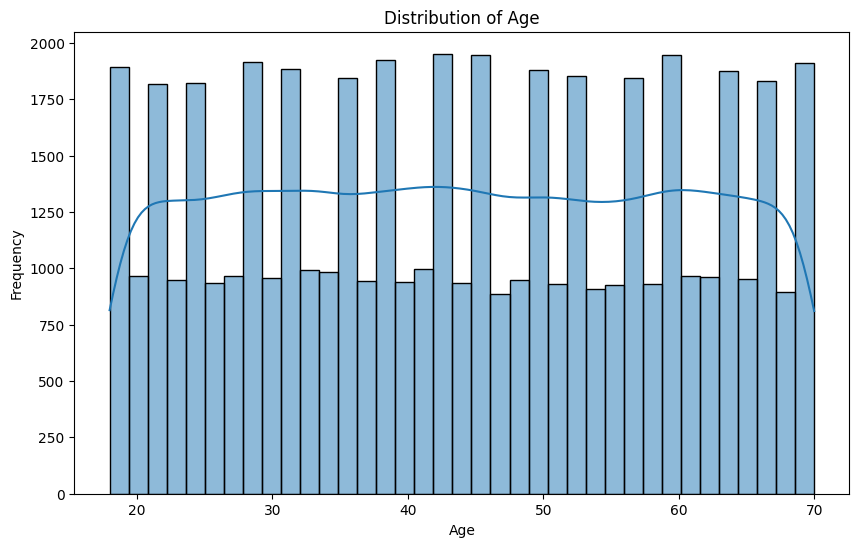

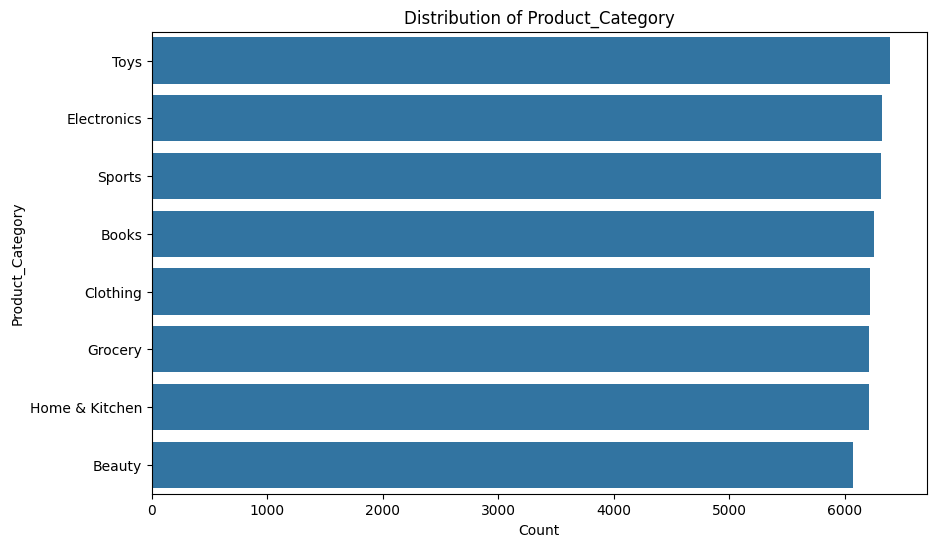

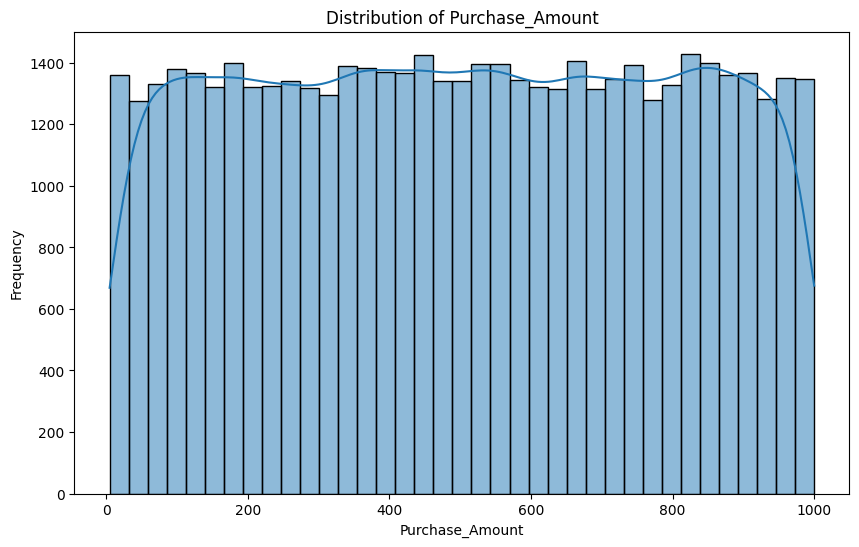

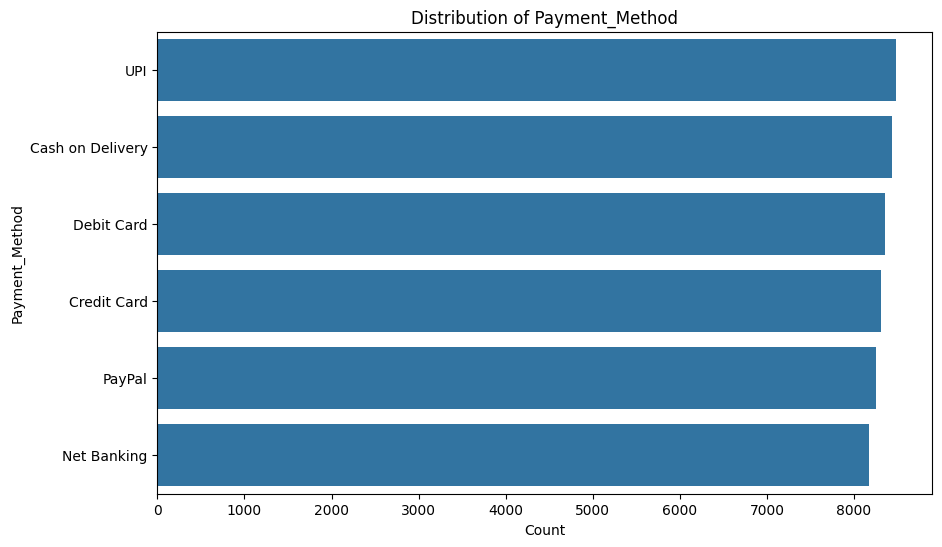

In [17]:
for col in selected_columns:
    plt.figure(figsize=(10, 6)) # Create a new figure for each plot
    if ecommerce_df[col].dtype in ['int64', 'float64']:
        # Use a histogram for numerical data
        sns.histplot(data=ecommerce_df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.savefig(f'Distribution of {col}')
    else:
        # Use a count plot for categorical data
        sns.countplot(data=ecommerce_df, y=col, order=ecommerce_df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.savefig(f'Distribution of {col}')
    plt.show()



In [18]:
import os

# Create a directory to save the plots if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    if ecommerce_df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=ecommerce_df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.savefig(f'plots/{col}_histogram.png') # Save as PNG
    else:
        sns.countplot(data=ecommerce_df, y=col, order=ecommerce_df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.savefig(f'plots/{col}_countplot.png') # Save as PNG
    plt.close() # Close the plot to free up memory